In [ ]:
pip install pandas


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
sns.set()

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
pip install pandas-profiling


In [3]:
df=pd.read_csv("../HealthPredict/indian_liver_patient.csv")

In [8]:
534 - 416

118

In [23]:
df_all0 = df[df.Dataset==2]

df_all1 = df[df.Dataset==1].iloc[0:118, :]

res = pd.concat([df_all0, df_all1], axis = 0)
shuffled_df = res.iloc[np.random.permutation(len(res))].reset_index(drop=True)

In [18]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [4]:
df.shape

(583, 11)

In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numberical Features

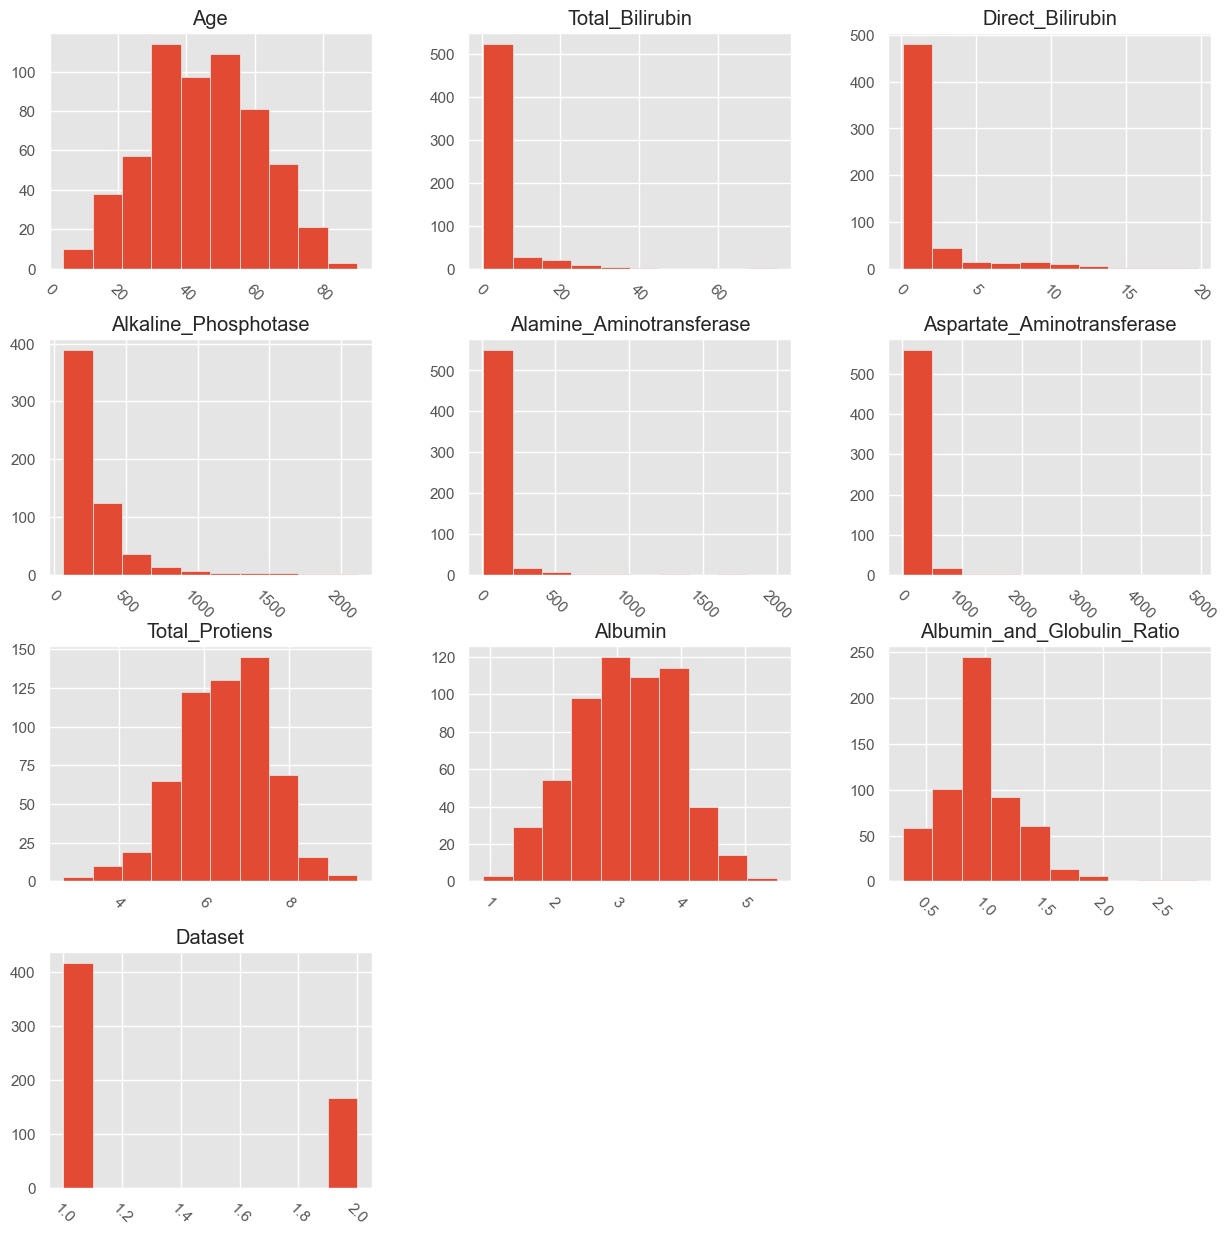

In [9]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [25]:
def convertdataset(x):
    if x==2:
        return 0
    return 1
shuffled_df['Dataset'] = shuffled_df['Dataset'].map(convertdataset)

In [13]:
df.Dataset.value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [14]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical features

In [31]:
shuffled_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,17,Male,0.9,0.2,279,40,46,7.3,4.0,1.20,0
1,41,Female,0.9,0.2,201,31,24,7.6,3.8,1.00,0
2,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
3,45,Female,0.7,0.2,164,21,53,4.5,1.4,0.45,0
4,68,Male,0.7,0.1,145,20,22,5.8,2.9,1.00,1


<Axes: xlabel='count', ylabel='Gender'>

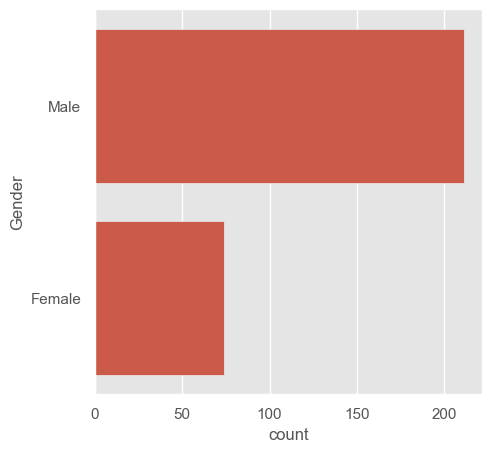

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=shuffled_df)

In [16]:
df[df['Gender'] == 'Male'][['Dataset','Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


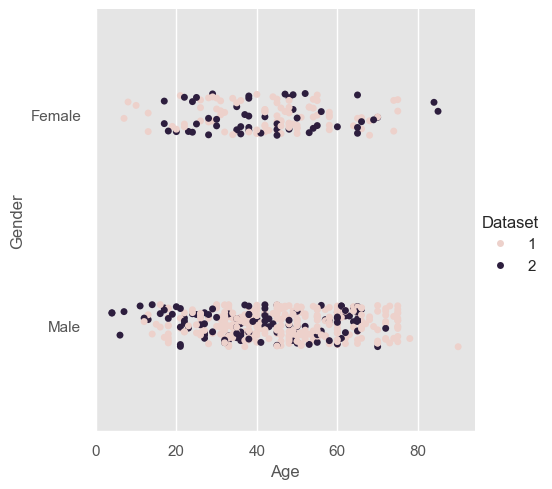

In [32]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df)

In [18]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [34]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
shuffled_df['Gender'] = shuffled_df['Gender'].map(convertgender)

In [37]:
shuffled_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,17,0,0.9,0.2,279,40,46,7.3,4.0,1.20,0
1,41,1,0.9,0.2,201,31,24,7.6,3.8,1.00,0
2,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
3,45,1,0.7,0.2,164,21,53,4.5,1.4,0.45,0
4,68,0,0.7,0.1,145,20,22,5.8,2.9,1.00,1


## Correlation

In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


- Positive Correlation-> one feature increases other also increases
- Negative Correlation-> one feature increases other decreases
- closer to 0-> weak relationship

<Axes: >

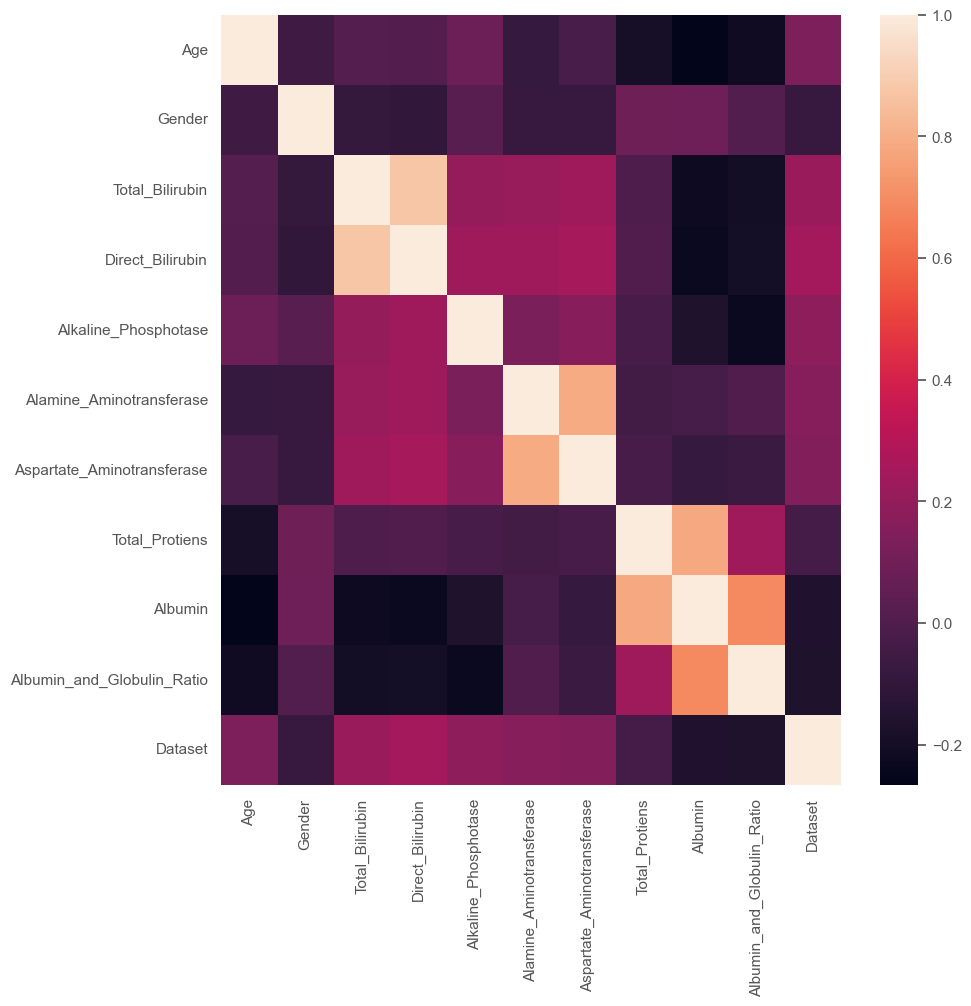

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

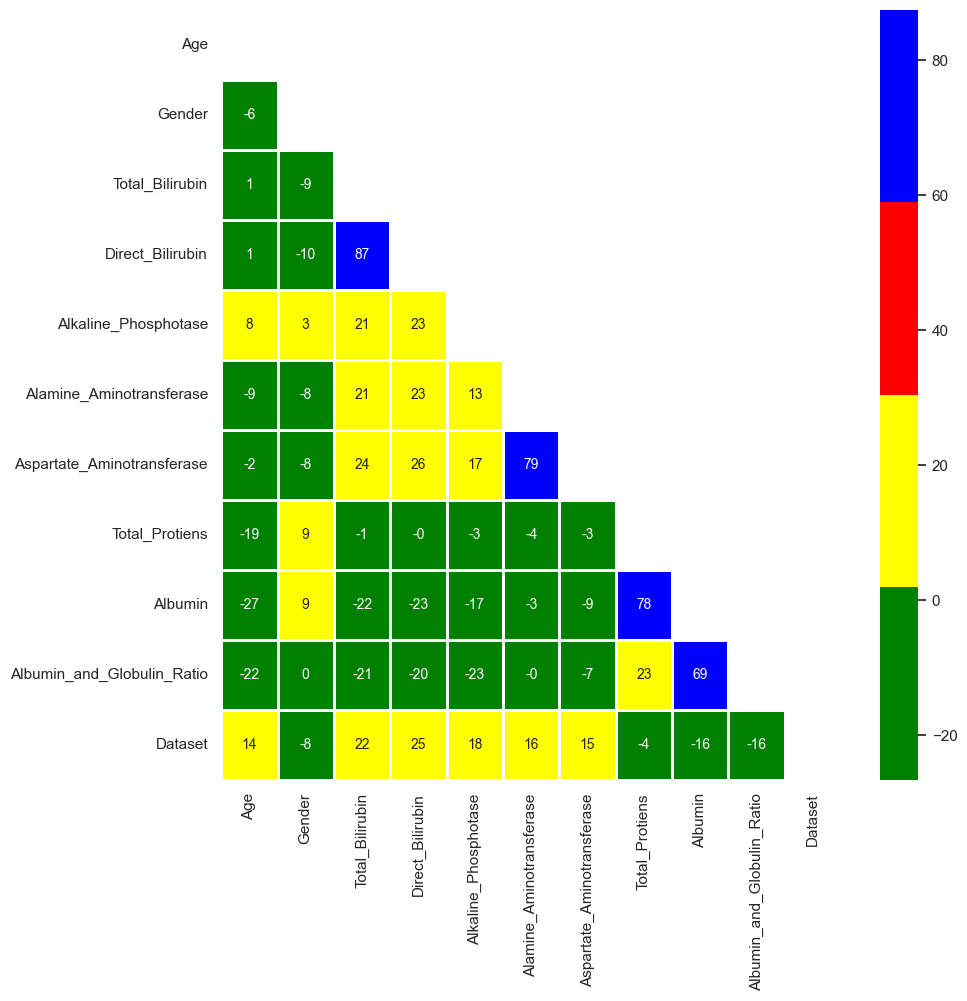

In [23]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [24]:
df = df.drop_duplicates()

In [25]:
df.shape

(570, 11)

# Removing Outlier

In [26]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<Axes: ylabel='Aspartate_Aminotransferase'>

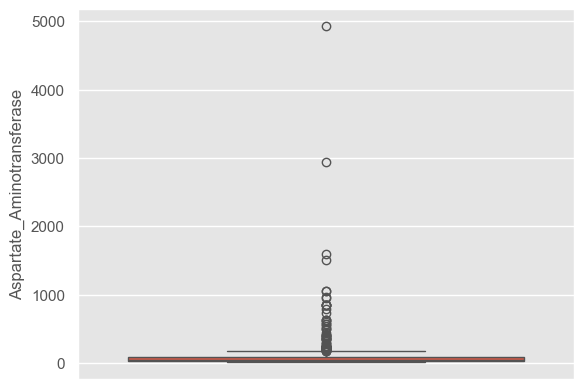

In [27]:
sns.boxplot(df.Aspartate_Aminotransferase)

<Axes: ylabel='Total_Bilirubin'>

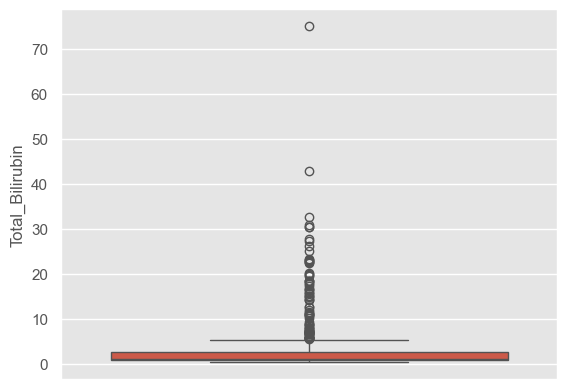

In [28]:
sns.boxplot(df.Total_Bilirubin)

In [29]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [39]:
shuffled_df = shuffled_df[shuffled_df.Aspartate_Aminotransferase<=3000]

In [40]:
shuffled_df.shape

(284, 11)

In [41]:
shuffled_df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

133    2946
34     1600
95     1050
77      960
142     950
Name: Aspartate_Aminotransferase, dtype: int64

In [42]:
shuffled_df = shuffled_df[shuffled_df.Aspartate_Aminotransferase<=2500]

In [43]:
shuffled_df.shape

(283, 11)

In [44]:
shuffled_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    2
Dataset                       0
dtype: int64

In [45]:
shuffled_df = shuffled_df.dropna(how='any')

In [37]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [38]:
df.shape

(564, 11)

# Machine Learning Model

## Data Preparation

In [ ]:
pip install scikit-learn

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install catboost


In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

In [47]:
y=shuffled_df.Dataset
X=shuffled_df.drop('Dataset', axis=1)

In [50]:
# Encode categorical columns
label_encoder = LabelEncoder()
shuffled_df["Gender"] = label_encoder.fit_transform(shuffled_df["Gender"])

In [51]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 10)
(57, 10)
(224,)
(57,)


## Data Standardization

In [53]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

### Saving the scaler object for input data scaling

In [66]:
import pickle
with open('liver_standard_scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

# Model

In [54]:
# Define all models
models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

# Evaluate Models

In [55]:
# Train & Evaluate Models
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        33
           1       0.93      0.54      0.68        24

    accuracy                           0.79        57
   macro avg       0.84      0.76      0.76        57
weighted avg       0.82      0.79      0.78        57


Ridge Classifier Accuracy: 0.7368
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        33
           1       0.91      0.42      0.57        24

    accuracy                           0.74        57
   macro avg       0.80      0.69      0.69        57
weighted avg       0.79      0.74      0.71        57


Decision Tree Accuracy: 0.6667
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        33
           1       0.62      0.54      0.58        24

    accuracy                           0.67        57
   macro avg       0.66

## Hyperparameter Tuning for Random Forest

In [46]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

In [47]:
## Evaluate Tuned Random Forest

In [48]:
# Evaluate Tuned Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_results["Tuned Random Forest"] = rf_accuracy
print("\nTuned Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Tuned Random Forest Accuracy: 0.7168141592920354
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        32
           1       0.80      0.80      0.80        81

    accuracy                           0.72       113
   macro avg       0.65      0.65      0.65       113
weighted avg       0.72      0.72      0.72       113



# Model Comparison Visualization

In [56]:
# Convert model results into a DataFrame
model_comparison_df = pd.DataFrame(model_results.items(), columns=["Model", "Accuracy"])

# Sort models by accuracy in descending order
model_comparison_df = model_comparison_df.sort_values(by="Accuracy", ascending=False)

print(model_comparison_df)

                  Model  Accuracy
0   Logistic Regression  0.789474
4     Gradient Boosting  0.789474
7              CatBoost  0.771930
10     SVM (RBF Kernel)  0.754386
1      Ridge Classifier  0.736842
3         Random Forest  0.736842
6              LightGBM  0.736842
9          SVM (Linear)  0.719298
5               XGBoost  0.701754
2         Decision Tree  0.666667
8   K-Nearest Neighbors  0.596491


In [50]:
# Save the model comparison DataFrame as a CSV file
model_comparison_df.to_csv("model_comparison.csv", index=False)

## logistic regression achieved highest accuracy, so saving the model for use

In [81]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7894736842105263


In [82]:
#save the model
pickle.dump(model, open('liver.pkl', 'wb'))

In [78]:
shuffled_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,17,0,0.9,0.2,279,40,46,7.3,4.0,1.20,0
1,41,1,0.9,0.2,201,31,24,7.6,3.8,1.00,0
2,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
3,45,1,0.7,0.2,164,21,53,4.5,1.4,0.45,0
4,68,0,0.7,0.1,145,20,22,5.8,2.9,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
280,45,1,0.7,0.2,153,41,42,4.5,2.2,0.90,0
281,60,0,4.0,1.9,238,119,350,7.1,3.3,0.80,1
282,66,1,2.9,1.3,168,21,38,5.5,1.8,0.40,1
283,49,1,0.8,0.2,158,19,15,6.6,3.6,1.20,0


#### also loading the scaler object

In [116]:
user_input= np.array([29,0,0.7,0.1,162,52,41,5.2,2.5,0.9]).reshape(1, 10)

In [120]:
user_input= np.array([19, 0, 0.7, 0.2, 186, 166, 397, 5.5, 3, 1.2]).reshape(1, 10)

In [115]:
len(user_input)

10

In [111]:
user_input = shuffled_df.iloc[:, :10].to_numpy()

In [121]:
sc = pickle.load(open('liver_standard_scaler.pkl', 'rb'))

user_input = sc.transform(user_input)

In [118]:
model_temp = pickle.load(open('liver.pkl', 'rb'))

In [122]:
model_temp.predict(user_input)

array([1], dtype=int64)

In [91]:
import tensorflow as tf

ModuleNotFoundError: No module named 'torch'

In [109]:
nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Input((10,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


In [110]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4692 - loss: 14.3612  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4193 - loss: 7.1992 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 1.6876 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6616 - loss: 1.6086 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6359 - loss: 1.1438 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.7061 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.6368 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6245 - loss: 0.6239 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.6432 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.6121 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5946 - loss: 0.6548 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.6263 

In [104]:
nn_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7412 - loss: 0.6357 


[0.7024350166320801, 0.7368420958518982]

In [ ]:
pip install joblib

In [ ]:
pip install pickle

saving the model

In [52]:
import pickle

In [62]:
with open('liver.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('liver_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [64]:
import pickle

# Correct loading (ensure you're loading the MODEL, not the scaler)
with open('liver.pkl', 'rb') as f:  # NOT liver_scaler.pkl
    model = pickle.load(f)  # This should be your LogisticRegression

# Load scaler separately if needed for transformations
with open('liver_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Proper prediction flow
X_test_scaled = scaler.transform(X_test)  # Scale first!
predictions = model.predict(X_test_scaled)  # Call predict on MODEL
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1]


In [59]:
loaded_model.predict(X_test_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [ ]:
# import joblib

In [ ]:
# Save the model
# joblib.dump(model, "logistic_model.pkl")

In [ ]:
# model = joblib.load("logistic_model.pkl")

In [55]:
 model.predict(X_train_scaled)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
 model.predict(X_test_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1], dtype=int64)